In [51]:
using Revise
using Plots
using Reparam
using LaTeXStrings

# Same Shape Optimization

Firstly I will use two curves representing the circle, and see if I am able to find the optimal reparametrization using the algorithm. I will first be using a simple quadratic polynomial as the diffeomorphism, then moving on to a less ewell behaved function consisting of both a steo function and a logarithmic function.

For both of these, I will also test the precision for different basis functions, as well as the convergence for different number of basis elements.

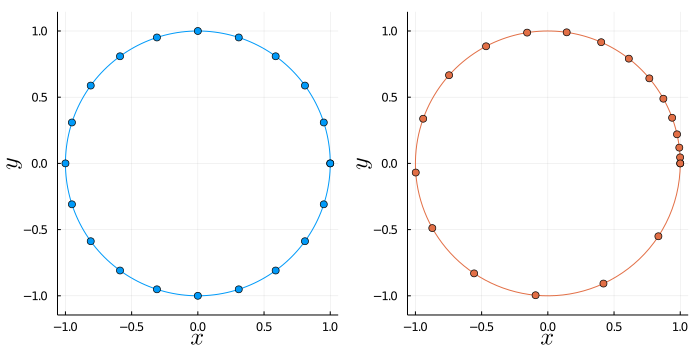

In [157]:
# Define test curves and functions
γopt(t) = 0.9t^2 + 0.1t  # Optimal Diffeomorphism
s1(t) = [cos(2π*t), sin(2π*t)] # Circle
s2 = s1 ∘ γopt


# Some plotting options
Tfine = 0:0.005:1
Tcoarse = 0:0.05:1
savepath="/home/jorgen/masters-thesis-shape-analysis/notes/curvenote/figures/circle1/"


p1 = plot_curve(s1, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", size=(600, 600), guidefont=16)
plot_curve!(s1, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
savefig(p1, savepath * "curve.pdf")


p2 = plot_curve(s2, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", size=(600, 600), guidefont=16)
plot_curve!(s2, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)
savefig(p2, savepath * "curve_reparam.pdf")

plot(p1, p2, size=(700, 350))

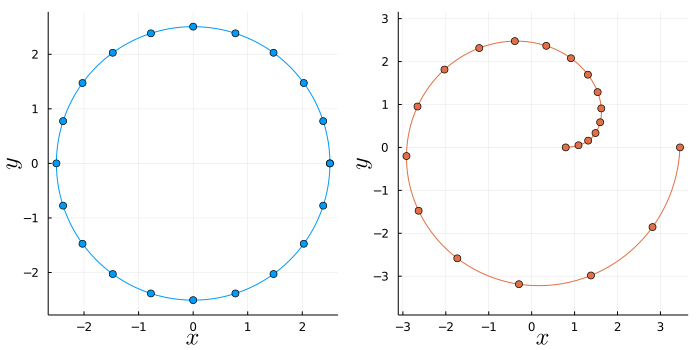

In [150]:
# Q-transforms (Want to reparametrize s1 to match s2)
r = Q_transform(s1)
q = Q_transform(s2)


p1 = plot_curve(r, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(r, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
savefig(p1, savepath * "curve_transform.pdf")


p2 = plot_curve(q, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(q, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)
savefig(p2, savepath * "curve_reparam_transform.pdf")


plot(p1, p2, size=(700, 350))

## Example Reparametrization
using Fourier Sine series to approximate the gradient.

In [151]:
proj = FourierSineProjector(4)
res = reparametrize(q, r, proj, maxiter=50, lsconfig=BacktrackConfig(c=0.8));

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 6.3185650397e+00 |                  |                  |                  |
|    1 | 2.6121016666e+00 | 5.2418229883e-03 | 9.1385533141e-04 | 6.4137183712e-02 | 5.8659891127e-01 |
|    2 | 1.2375924724e+00 | 6.8672937316e-03 | 9.6976329275e-04 | 4.0636638351e-02 | 5.2620815331e-01 |
|    3 | 7.0551599662e-01 | 5.4902463278e-03 | 8.6144873641e-04 | 2.3901126959e-02 | 4.2992866201e-01 |
|    4 | 4.7639591713e-01 | 1.0231235566e-02 | 7.6782678548e-04 | 1.4820377532e-02 | 3.2475532886e-01 |
|    5 | 3.2928938533e-01 | 9.0604577842e-03 | 8.3946055972e-04 | 1.2385268242e-02 | 3.0879049653e-01 |
|    6 | 2.5259159049e-01 | 1.0679293650e-02 | 6.4917639766e-04 | 7.8296821944e-03 | 2.3291912299e-01 |
|    7 | 1.780

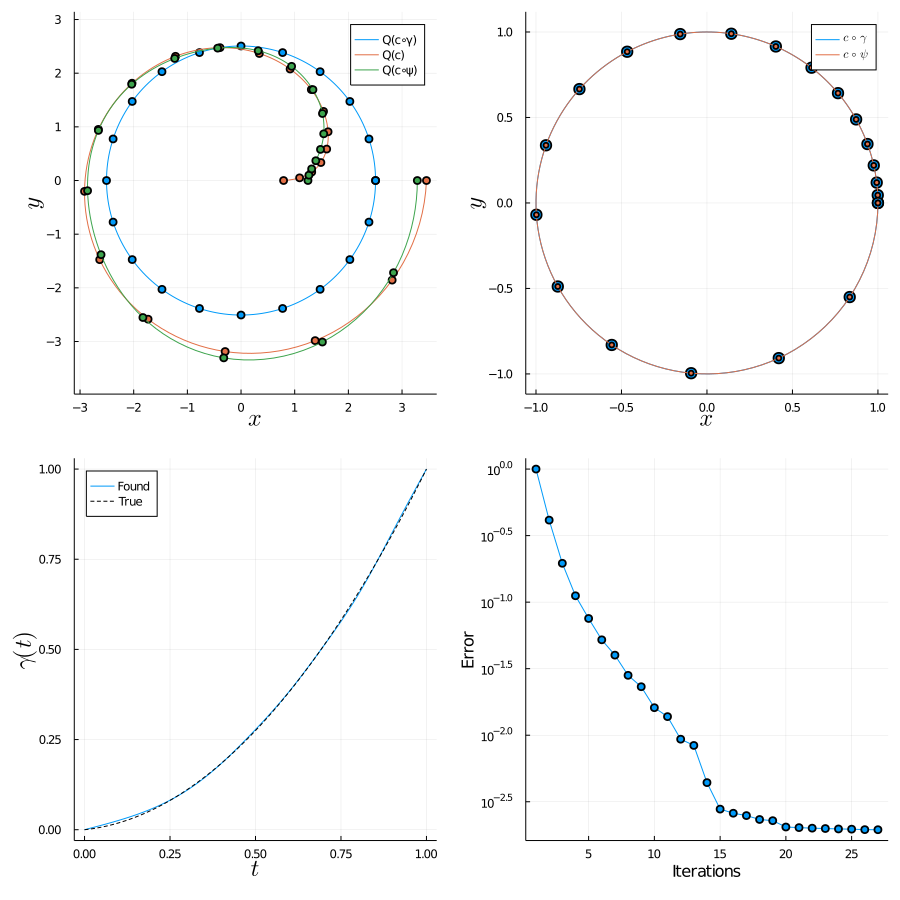

In [159]:
ψ = ∘(res.reparams...)
ropt = Q_reparametrization(r, ψ)

p1 = plot_curve(r, Tfine, color=1, legend=true, label="Q(c∘γ)", xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(r, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
plot_curve!(q, Tfine, color=2, label="Q(c)")
plot_curve!(q, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal, label="")
plot_curve!(ropt, Tfine, color=3, label="Q(c∘ψ)")
plot_curve!(ropt, Tcoarse, seriestype=:scatter, color=3, aspect_ratio=:equal, label="")
savefig(p1, savepath * "reparametrized_qmaps.pdf")


p2 = plot_curve(s1 ∘ γopt, Tfine, color=1, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600), label=L"c\circ\gamma")
plot_curve!(s1 ∘ γopt, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="", ms=6)
plot_curve!(s2, Tfine, color=2, label=L"c\circ\psi")
plot_curve!(s2, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal, ms=3, label="")
savefig(p2, savepath * "reparametrized_curves.pdf")



p3 = plot(ψ, Tfine, label="Found", xlabel=L"t", ylabel=L"\gamma(t)", guidefont=16, legend=:topleft)
plot!(γopt, Tfine, label="True", color=:black, ls=:dash)
savefig(p3, savepath * "reparametrized_diffeomorphisms.pdf")

p4 = plot(res.errors ./ res.errors[1], yscale=:log10, shape=:circle, ylabel="Error", xlabel="Iterations", legend=false)
savefig(p4, savepath * "reparametrization_error.pdf")

plot(p1, p2, p3, p4,  size=(900, 900))

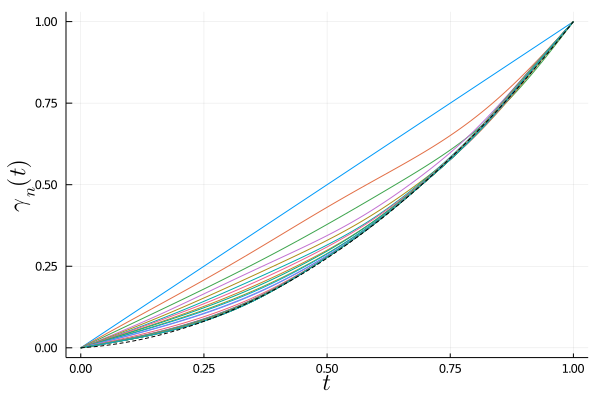

In [164]:
Γ = accumulate_composition(res.reparams[1:1:end])

p1 = plot(Γ, Tfine, legend=false, xlabel=L"t", ylabel=L"\gamma_n(t)", guidefont=16)
plot!(γopt, Tfine, color=:black, ls=:dash)
savefig(p1, savepath * "diffeomorphism_stepwise.pdf")

p1